## Replace this text with your name

In the cell below, include **all** your ``import`` statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Solve projectile motion with air resistance,

$$ \frac{d}{dt} \left( \begin{array}{c} x \\ y \\ v_x \\ v_y \end{array} \right) = \left( \begin{array}{c} v_x \\ v_y \\ - b v_x \\ - 9.8 -  b v_y \end{array} \right) $$

with $b = 0.1$ and initial conditions, (x, y, vx, vy) = (0, 0, 30, 40). You should use:
- a function whose inputs are
    -  an array of the dependent variables
    -  $\Delta t$
    -  the function that takes the array of inputs and $b$ and outputs the derivative
    -  $b$
- and whose output is an array of the dependent variables after taking a step.

Calculate the motion and create a plot of the trajectory, y vs. x

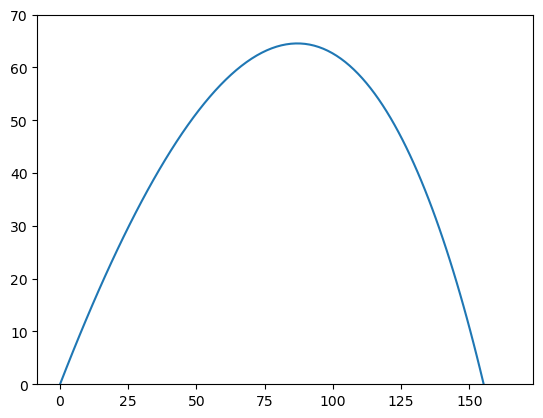

In [2]:
x = 0
y = 0
vx = 30
vy = 40
b=0.1
ax = -b*vx 
ay= -9.8-(b*vy)
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

def der(x_in, b): 
    x, y, vx, vy = x_in
    derivative = np.zeros(4)
    derivative[:] = [vx, vy, -b*vx, -9.8-(b*vy)]
    return derivative
def timestep2(x_in, dt, der, b):
    k1 = der(x_in,b) * dt
    k2 = der(x_in + k1, b) * dt
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final
x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1,len(time)):
    x_array = timestep2(x_array, dt,der,b)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]  
plt.figure()
plt.ylim(0,70)
plt.plot(x_step, y_step)
plt.show()

**Exercise:** The Moon's orbit. We can consider the orbit of the Moon around the Earth with the differential equation
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - \frac{G M}{(x^2+y^2)^{3/2}} x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = - \frac{G M}{(x^2+y^2)^{3/2}} y$$
Here, $G M$ is the product of Newton's gravitational constant, $G$, and the mass of the Earth, $M$. With the initial conditions $(x, y) = (R, 0)$ and $(v_x, v_y) = (0, 1.1v)$. 
- Plot y vs. x. On your plot, add a point for the Earth, and make sure the plot is square with even limits for x and y.
- Plot energy vs time.

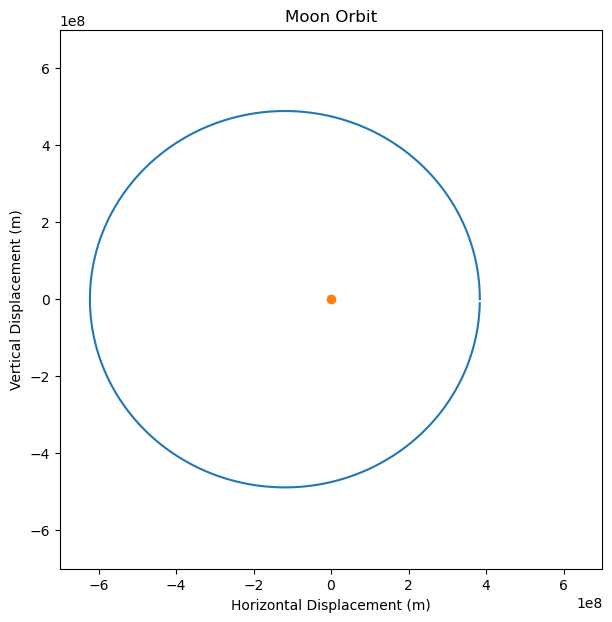

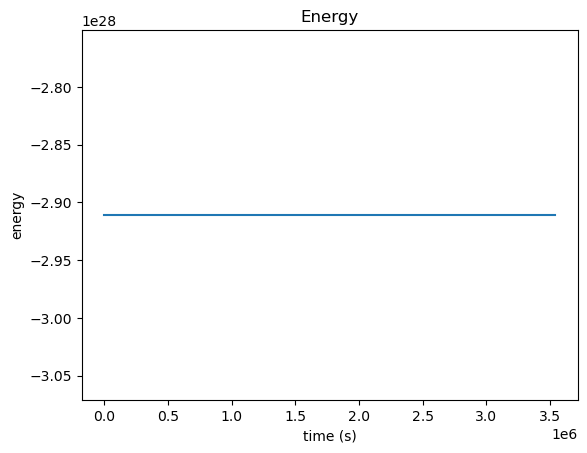

In [3]:
x = 384000000
y = 0
vx = 0
vy = 1.1*1030
G = 6.67430e-11
M = 5.972e24
m = 7.34767309e22
time = np.linspace(0,3542400,1000)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

def der(x_in): 
    x, y, vx, vy = x_in
    ax = -((G*M*x)/((x**2 + y**2)**(3/2)))
    ay= -((G*M*y)/((x**2 + y**2)**(3/2)))
    derivative = np.zeros(4)
    derivative[:] = [vx, vy, ax, ay]
    return derivative
def timestep2(x_in, dt, der):
    k1 = der(x_in) * dt
    k2 = der(x_in + k1) * dt
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final
x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1,len(time)):
    x_array = timestep2(x_array, dt,der)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]  



plt.figure(figsize=(7,7))
plt.plot(x_step, y_step)
plt.xlabel('Horizontal Displacement (m)')
plt.ylabel('Vertical Displacement (m)')
plt.title('Moon Orbit')
plt.xlim(-700000000,700000000)
plt.ylim(-700000000,700000000)
plt.plot(0,0,'o')
plt.show()

ET = np.zeros(len(time))
def Energy(x,y,vx,vy):
    return m*0.5*((vx**2)+(vy**2)) -(G*M*m)/np.sqrt((x**2) + (y**2))

def energy_function_array(x_in):
    return ET(x_in[0], x_in[1], x_in[2], x_in[3])
ET[0] = Energy(x,y,vx,vy)
for i in range(1,len(time)):
    x_array = timestep2(x_array, dt, der)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    ET[i] = Energy(x,y,vx,vy)

plt.figure()
plt.plot(time,ET)
plt.title('Energy')
plt.xlabel('time (s)')
plt.ylabel('energy')
plt.show()

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.